In [1]:
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pickle
from tensorflow.keras.models import load_model

In [2]:
# Save the model architecture and weights
saved_dir = 'D:/JATHURSH/Jupyter_notebook_projects/DistractionDetection/saved_data/models/'

# Load the model
distraction_detection_model = load_model(saved_dir + 'dis_det_model.h5')

# Load the model history from the pickle file
with open(saved_dir + 'dis_det_model_history.pkl', 'rb') as file:
    model_history = pickle.load(file)

In [4]:
# load test split
saved_test_dir = 'D:/JATHURSH/Jupyter_notebook_projects/DistractionDetection/saved_data/train_val_test_preprocessed/'
saved_test_dir_2 = 'D:/JATHURSH/Jupyter_notebook_projects/DistractionDetection/saved_data/test_split/'

X_test = np.load(saved_test_dir + 'X_test_preprocessed_lec.npy')
y_test = np.load(saved_test_dir_2 + 'y_test_lec.npy')

In [5]:
X_test.shape, y_test.shape

((1000, 224, 224, 3), (1000,))

In [6]:
training_loss = model_history['loss']
validation_loss = model_history['val_loss']

training_accuracy = model_history['accuracy']
validation_accuracy = model_history['val_accuracy']

# Calculate the number of training epochs:
# - `len(training_loss)` calculates the length of the training_loss list, which typically
#   contains the loss value at the end of each training epoch.
# - This length tells us how many epochs the machine learning model was trained for.

# Create a range of values representing epochs:
# - `range(1, len(training_loss) + 1)` generates a Python range object starting from 1 and
#   ending at the length of the training_loss list plus one.
# - The +1 is added to ensure that the range includes values up to the number of epochs.
# - This range is often used as the x-axis when plotting training metrics against the
#   number of training iterations (epochs).
epochs = range(1, len(training_loss) + 1)

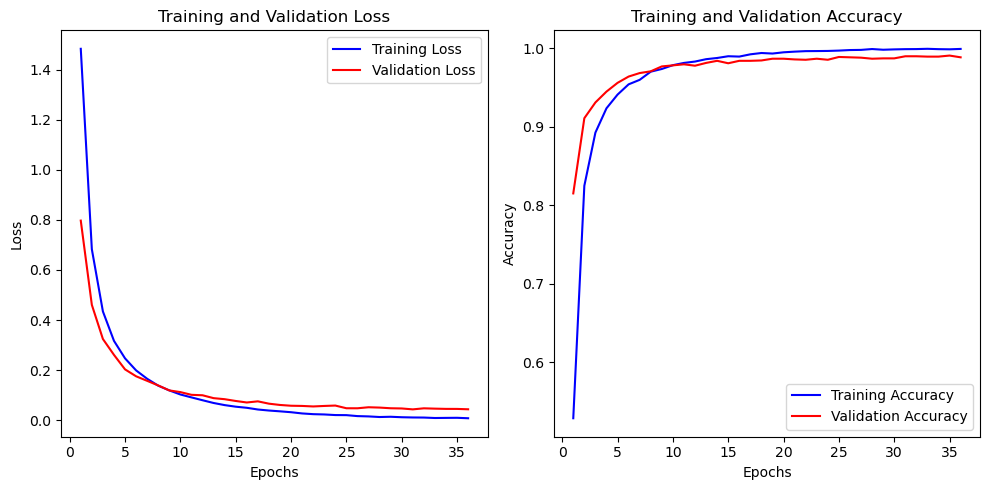

In [7]:
# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, training_loss, 'b', label='Training Loss')
plt.plot(epochs, validation_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, training_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, validation_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [8]:
from keras.utils import to_categorical

# y_test contains integer labels so - one hot encode 
y_test_one_hot = to_categorical(y_test, num_classes=10)
y_test_one_hot[:3]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

In [9]:
distraction_detection_model.evaluate(X_test, y_test_one_hot)

32/32 [==============================] - 29s 805ms/step - loss: 2.8097 - accuracy: 0.4530


[2.8097028732299805, 0.453000009059906]

In [10]:
y_pred = distraction_detection_model.predict(X_test)

32/32 [==============================] - 28s 809ms/step


In [11]:
y_pred[:2]

array([[2.10196595e-04, 5.93213923e-03, 4.39431332e-02, 3.88327680e-05,
        5.02265058e-03, 7.87808502e-04, 8.31171274e-01, 1.46228325e-04,
        1.10730074e-01, 2.01751105e-03],
       [7.03637719e-01, 1.53732792e-01, 1.88917189e-03, 3.22339183e-04,
        1.89076166e-03, 5.80098480e-03, 2.68810359e-03, 2.00638860e-05,
        1.45489664e-03, 1.28563181e-01]], dtype=float32)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'True label: 6')

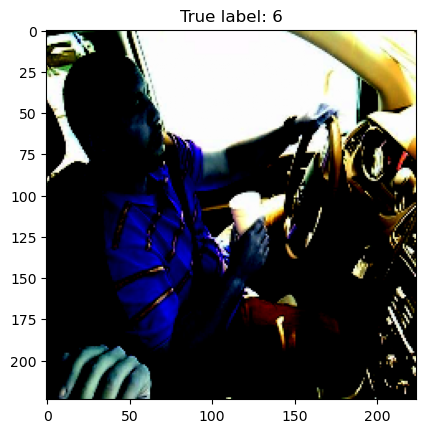

In [14]:
plt.imshow(X_test[1])
plt.title(f'True label: {y_test[1]}')

In [19]:
y_pred_binary = np.argmax(y_pred, axis=1)
y_pred_binary[:1]

array([6], dtype=int64)

In [20]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)

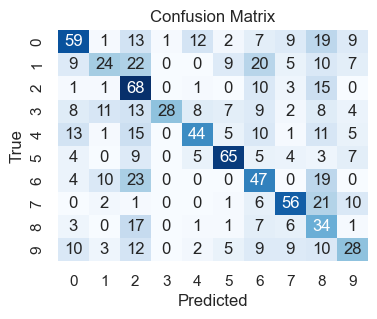

In [21]:
# Create a heatmap of the confusion matrix using seaborn
plt.figure(figsize=(4, 3))
sns.set(font_scale=1.0)
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [22]:
# create classification report
class_report = classification_report(y_test, y_pred_binary)
print(class_report)

              precision    recall  f1-score   support

           0       0.53      0.45      0.49       132
           1       0.45      0.23      0.30       106
           2       0.35      0.69      0.47        99
           3       0.97      0.29      0.44        98
           4       0.60      0.42      0.49       105
           5       0.68      0.64      0.66       102
           6       0.36      0.46      0.40       103
           7       0.59      0.58      0.58        97
           8       0.23      0.49      0.31        70
           9       0.39      0.32      0.35        88

    accuracy                           0.45      1000
   macro avg       0.52      0.45      0.45      1000
weighted avg       0.53      0.45      0.46      1000

